# IS 675 - Group Project

## ML Model - Injury / Non Injury Classification in Road Accidents

##Data Understanding and Preprocessing
####Upload Data
Mount Google Drive to access the dataset stored in Google Drive.
Import necessary libraries for data manipulation and visualization.


####Data Cleaning
Check the column names and select the desired columns. Check for missing values. Examine variable types and convert categorical variables to the 'category' data type.

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/IS675_data/DL Project Data 2/accident22.csv")
df2=pd.read_csv("/content/drive/MyDrive/IS675_data/DL Project Data 2/accident21.csv")
df3=pd.read_csv("/content/drive/MyDrive/IS675_data/DL Project Data 2/accident20.csv")

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

accident = pd.concat([df1, df2, df3], ignore_index=True)
accident.head()

,CASENUM,PSU,PSU_VAR,PSUSTRAT,REGION,REGIONNAME,URBANICITY,URBANICITYNAME,STRATUM,STRATUMNAME,PJ,WEIGHT,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERMVIT,MONTH,MONTHNAME,DAY_WEEK,DAY_WEEKNAME,WKDY_IM,WKDY_IMNAME,YEAR,YEARNAME,HOUR,HOURNAME,HOUR_IM,HOUR_IMNAME,MINUTE,MINUTENAME,MINUTE_IM,MINUTE_IMNAME,HARM_EV,HARM_EVNAME,EVENT1_IM,EVENT1_IMNAME,MAN_COLL,MAN_COLLNAME,MANCOL_IM,MANCOL_IMNAME,RELJCT1,RELJCT1NAME,RELJCT1_IM,RELJCT1_IMNAME,RELJCT2,RELJCT2NAME,RELJCT2_IM,RELJCT2_IMNAME,TYP_INT,TYP_INTNAME,REL_ROAD,REL_ROADNAME,WRK_ZONE,WRK_ZONENAME,LGT_COND,LGT_CONDNAME,LGTCON_IM,LGTCON_IMNAME,WEATHER,WEATHERNAME,WEATHR_IM,WEATHR_IMNAME,SCH_BUS,SCH_BUSNAME,INT_HWY,INT_HWYNAME,MAX_SEV,MAX_SEVNAME,MAXSEV_IM,MAXSEV_IMNAME,NUM_INJ,NUM_INJNAME,NO_INJ_IM,NO_INJ_IMNAME,ALCOHOL,ALCOHOLNAME,ALCHL_IM,ALCHL_IMNAME
0,202203729314,75,75,19,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,Rural Area,5,Stratum 5 - NLMY PV Serious Injury,4144,29.239053,0,0,2,2,0,2,1,January,7,Saturday,7,Saturday,2022,2022,9,9:00am-9:59am,9,9:00am-9:59am,48,48,48,48,12,Motor Vehicle In-Transport,12,Motor Vehicle In-Transport,2,Front-to-Front,2,Front-to-Front,0,No,0,No,1,Non-Junction,1,Non-Junction,1,Not an Intersection,1,On Roadway,0,NaN,1,Daylight,1,Daylight,2,Rain,2,Rain,0,No,0,No,4,Fatal Injury (K),4,Fatal Injury (K),2,2,2,2,9,Reported as Unknown,2,No Alcohol Involved
1,202203729974,48,48,12,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,Urban Area,6,Stratum 6 - LMY PV Minor Injury,85,48.398719,0,0,1,1,0,1,1,January,7,Saturday,7,Saturday,2022,2022,21,9:00pm-9:59pm,21,9:00pm-9:59pm,38,38,38,38,42,Tree (Standing Only),42,Tree (Standing Only),0,The First Harmful Event was Not a Collision wi...,0,The First Harmful Event was Not a Collision wi...,0,No,0,No,1,Non-Junction,1,Non-Junction,1,Not an Intersection,4,On Roadside,0,NaN,2,Dark - Not Lighted,2,Dark - Not Lighted,2,Rain,2,Rain,0,No,1,Yes,2,Suspected Minor Injury (B),2,Suspected Minor Injury (B),1,1,1,1,2,No Alcohol Involved,2,No Alcohol Involved
2,202203729978,48,48,12,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,Urban Area,10,Stratum 10 - Other,91,195.360474,0,0,2,2,0,3,1,January,1,Sunday,1,Sunday,2022,2022,5,5:00am-5:59am,5,5:00am-5:59am,55,55,55,55,12,Motor Vehicle In-Transport,12,Motor Vehicle In-Transport,1,Front-to-Rear,1,Front-to-Rear,0,No,0,No,1,Non-Junction,1,Non-Junction,1,Not an Intersection,1,On Roadway,0,NaN,3,Dark - Lighted,3,Dark - Lighted,2,Rain,2,Rain,0,No,0,No,0,No Apparent Injury (O),0,No Apparent Injury (O),0,No Person Injured/Property Damage Only Crash,0,No Person Injured/Property Damage Only Crash,2,No Alcohol Involved,2,No Alcohol Involved
3,202203730035,48,48,12,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,Urban Area,10,Stratum 10 - Other,87,195.360474,0,0,2,2,0,2,1,January,7,Saturday,7,Saturday,2022,2022,22,10:00pm-10:59pm,22,10:00pm-10:59pm,5,5,5,5,12,Motor Vehicle In-Transport,12,Motor Vehicle In-Transport,1,Front-to-Rear,1,Front-to-Rear,0,No,0,No,1,Non-Junction,1,Non-Junction,1,Not an Intersection,1,On Roadway,0,NaN,3,Dark - Lighted,3,Dark - Lighted,2,Rain,2,Rain,0,No,0,No,0,No Apparent Injury (O),0,No Apparent Injury (O),0,No Person Injured/Property Damage Only Crash,0,No Person Injured/Property Damage Only Crash,9,Reported as Unknown,2,No Alcohol Involved
4,202203730040,48,48,12,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,Urban Area,8,Stratum 8 - NLMY PV Minor Injury,87,119.272156,0,0,1,1,0,1,1,January,1,Sunday,1,Sunday,2022,2022,2,2:00am-2:59am,2,2:00am-2:59am,0,0,0,0,24,Guardrail Face,24,Guardrail Face,0,The First Harmful Event was Not a Collision wi...,0,The First Harmful Event was Not a Collision wi...,1,Yes,1,Yes,19,Other location within Interchange Area,19,Other location within Interchange Area,1,Not an Intersection,4,On Roadside,0,NaN,3,Dark - Lighted,3,Dark - Lighted,99,Reported as Unknown,1,Clear,0,No,0,No,1,Possible Injury (C),1,Possible Injury (C),1,1,1,1,1,Alcohol Involved,1,Alcohol Involved


In [ ]:
print("Unique values in NO_INJ_IM:", accident['NO_INJ_IM'].unique())
print("Value counts in NO_INJ_IM:\n", accident['NO_INJ_IM'].value_counts())

Unique values in NO_INJ_IM: [ 2  1  0  4  3  5  6  8  7  9 13 11 12 10 14 17]
Value counts in NO_INJ_IM:
 NO_INJ_IM
0     75936
1     60735
2     17559
3      5397
4      1941
5       791
6       316
7       137
8        46
9        18
10       10
11        5
13        3
12        3
14        2
17        1
Name: count, dtype: int64


In [ ]:
# Map all non-zero values in NO_INJ_IM to 1
accident['NO_INJ_IM'] = accident['NO_INJ_IM'].apply(lambda x: 1 if x != 0 else 0)

# Verify the unique values and their counts
print("Unique values in NO_INJ_IM:", accident['NO_INJ_IM'].unique())
print("Value counts in NO_INJ_IM:\n", accident['NO_INJ_IM'].value_counts())


Unique values in NO_INJ_IM: [1 0]
Value counts in NO_INJ_IM:
 NO_INJ_IM
1    86964
0    75936
Name: count, dtype: int64


##Visualizations

In [ ]:
accident.keys()

Index(['CASENUM', 'PSU', 'PSU_VAR', 'PSUSTRAT', 'REGION', 'REGIONNAME',
       'URBANICITY', 'URBANICITYNAME', 'STRATUM', 'STRATUMNAME', 'PJ',
       'WEIGHT', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PERMVIT', 'MONTH', 'MONTHNAME', 'DAY_WEEK', 'DAY_WEEKNAME', 'WKDY_IM',
       'WKDY_IMNAME', 'YEAR', 'YEARNAME', 'HOUR', 'HOURNAME', 'HOUR_IM',
       'HOUR_IMNAME', 'MINUTE', 'MINUTENAME', 'MINUTE_IM', 'MINUTE_IMNAME',
       'HARM_EV', 'HARM_EVNAME', 'EVENT1_IM', 'EVENT1_IMNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'MANCOL_IM', 'MANCOL_IMNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT1_IM', 'RELJCT1_IMNAME', 'RELJCT2', 'RELJCT2NAME', 'RELJCT2_IM',
       'RELJCT2_IMNAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'LGTCON_IM',
       'LGTCON_IMNAME', 'WEATHER', 'WEATHERNAME', 'WEATHR_IM', 'WEATHR_IMNAME',
       'SCH_BUS', 'SCH_BUSNAME', 'INT_HWY', 'INT_HWYNAME', 'MAX_SEV',
       'MAX_SEVN

In [ ]:
# Load your dataset (replace 'data.csv' with your actual file)
df = accident

# Ensure categorical columns are treated as such
categorical_columns = ['DAY_WEEKNAME', 'HARM_EVNAME', 'TYP_INTNAME', 'LGT_CONDNAME', 'WEATHERNAME', 'INT_HWYNAME', 'NUM_INJNAME', 'NO_INJ_IMNAME']
for col in categorical_columns:
    df[col] = df[col].astype('category')

<ipython-input-9-46c44c14a6c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DAY_WEEKNAME', palette='viridis')


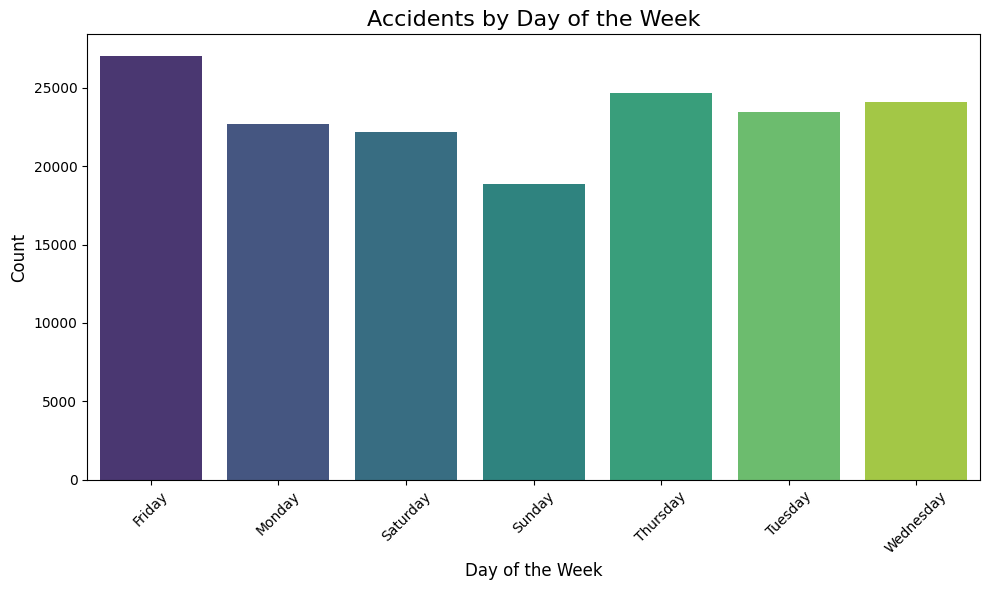

In [ ]:
# 1. Bar Plot: Distribution of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_WEEKNAME', palette='viridis')
plt.title('Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

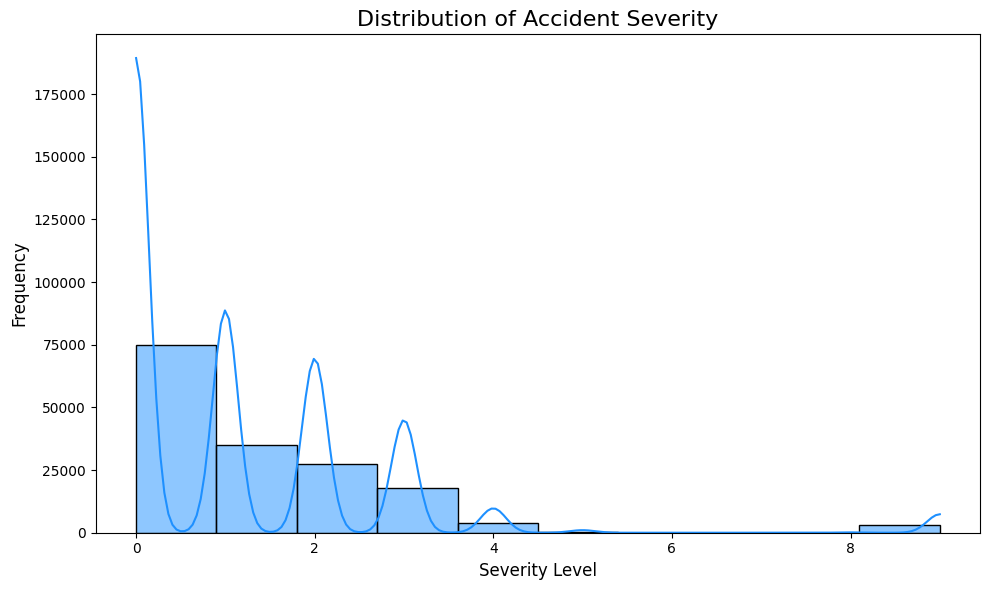

In [ ]:
# 3. Histogram: Distribution of the severity of accidents
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MAX_SEV', bins=10, kde=True, color='dodgerblue')
plt.title('Distribution of Accident Severity', fontsize=16)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

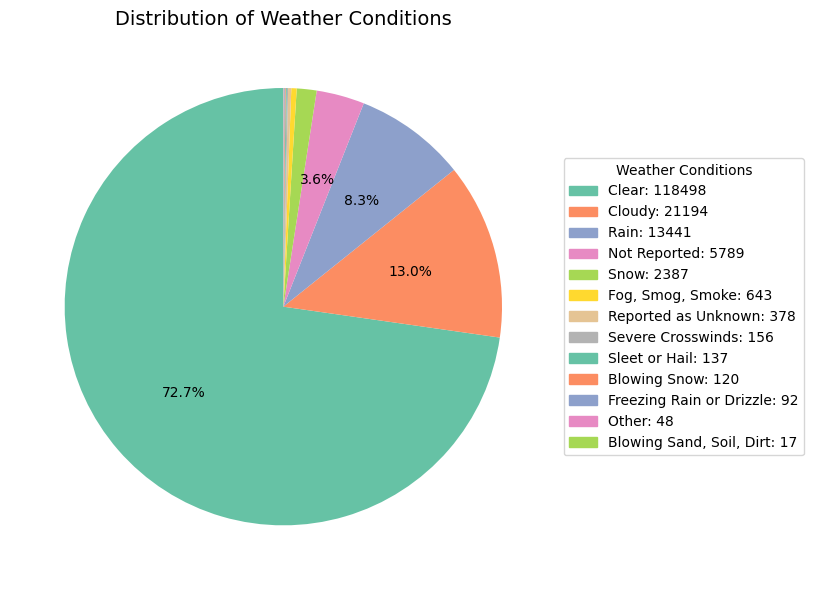

In [ ]:
import pandas as pd
from matplotlib.patches import Patch

# Aggregate data for weather conditions
weather_condition_counts = df['WEATHERNAME'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the pie chart with percentages and a clean layout
wedges, texts, autotexts = ax.pie(
    weather_condition_counts,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',  # Hide small percentages
    startangle=90,
    colors=plt.cm.Set2.colors,
    textprops={'fontsize': 10}
)

# Add a legend to the side with weather condition names and counts
legend_labels = [
    f"{label}: {count}" for label, count in zip(weather_condition_counts.index, weather_condition_counts.values)
]
legend_patches = [Patch(color=wedges[i].get_facecolor(), label=legend_labels[i]) for i in range(len(wedges))]
ax.legend(
    handles=legend_patches,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Weather Conditions",
    fontsize=10
)

# Set chart title
plt.title('Distribution of Weather Conditions', fontsize=14)

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()


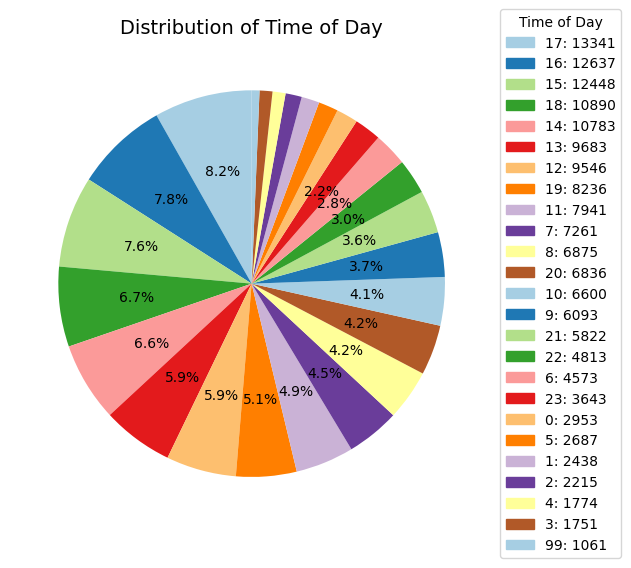

In [ ]:
# Aggregate data for time of day
time_of_day_counts = df['HOUR'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the pie chart with percentages and a clean layout
wedges, texts, autotexts = ax.pie(
    time_of_day_counts,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',  # Hide small percentages
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 10}
)

# Add a legend to the side with time of day and counts
legend_labels = [
    f"{label}: {count}" for label, count in zip(time_of_day_counts.index, time_of_day_counts.values)
]
legend_patches = [Patch(color=wedges[i].get_facecolor(), label=legend_labels[i]) for i in range(len(wedges))]
ax.legend(
    handles=legend_patches,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Time of Day",
    fontsize=10
)

# Set chart title
plt.title('Distribution of Time of Day', fontsize=14)

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()

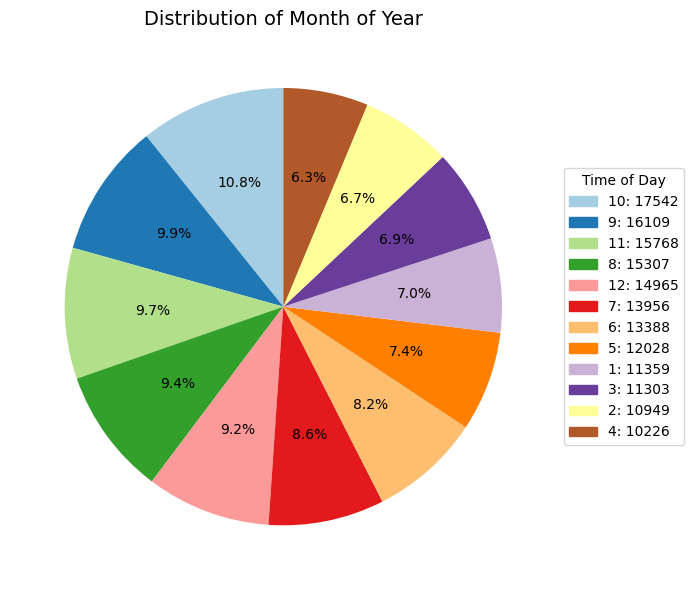

In [ ]:

# Aggregate data for time of day
time_of_day_counts = df['MONTH'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Generate the pie chart with percentages and a clean layout
wedges, texts, autotexts = ax.pie(
    time_of_day_counts,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',  # Hide small percentages
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 10}
)


legend_labels = [
    f"{label}: {count}" for label, count in zip(time_of_day_counts.index, time_of_day_counts.values)
]
legend_patches = [Patch(color=wedges[i].get_facecolor(), label=legend_labels[i]) for i in range(len(wedges))]
ax.legend(
    handles=legend_patches,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Time of Day",
    fontsize=10
)

# Set chart title
plt.title('Distribution of Month of Year', fontsize=14)

# Adjust layout to avoid overlaps
plt.tight_layout()
plt.show()

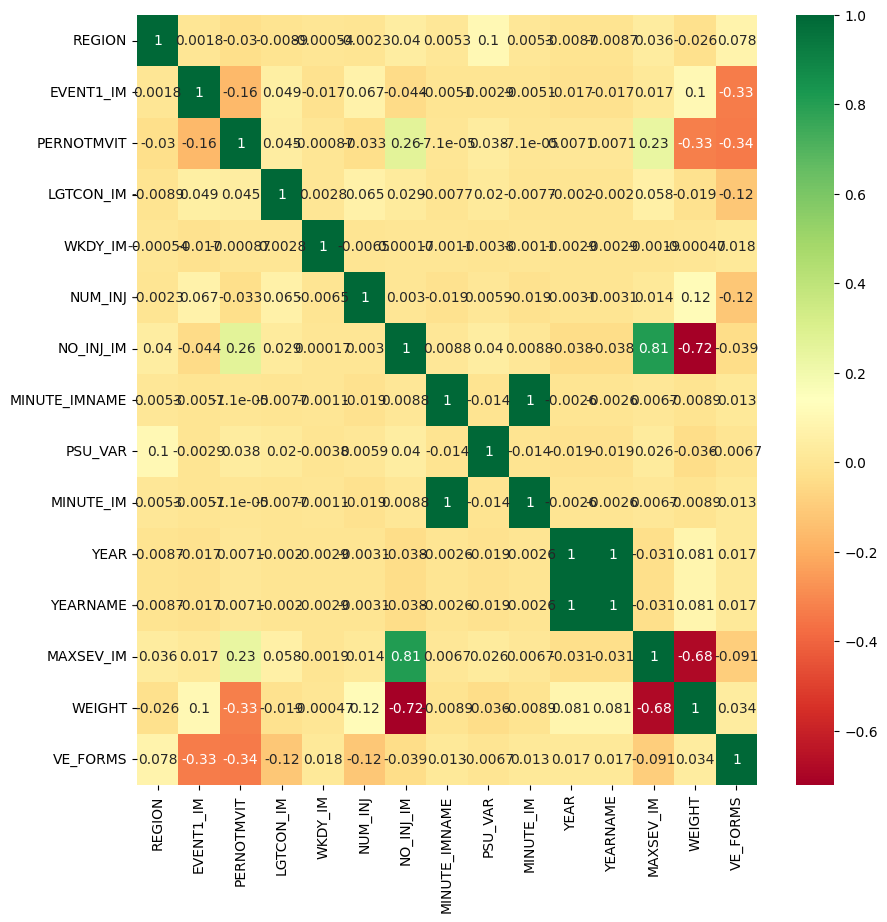

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = accident.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

high_corr_list = list(high_corr_vars)

if high_corr_list:
    plt.figure(figsize=(10, 10))
    sns.heatmap(numeric_cols[high_corr_list].corr(), annot=True, cmap="RdYlGn")
    plt.show()
else:
    print("No highly correlated variables found")


In [ ]:
# Drop columns that are irrelevant or redundant for classification
columns_to_drop = [
    'CASENUM', 'PSU', 'PSU_VAR', 'PSUSTRAT', 'URBANICITYNAME', 'STRATUM', 'STRATUMNAME', 'MINUTE_IM',
    'MINUTE_IMNAME', 'HOURNAME', 'HOUR_IMNAME', 'EVENT1_IM', 'EVENT1_IMNAME',
    'WKDY_IMNAME', 'LGTCON_IM', 'LGTCON_IMNAME', 'WEATHR_IM', 'WEATHR_IMNAME',
    'RELJCT1NAME', 'RELJCT1_IM', 'RELJCT1_IMNAME', 'RELJCT2NAME',
    'RELJCT2_IM', 'RELJCT2_IMNAME', 'MAN_COLLNAME', 'MANCOL_IM',
    'MANCOL_IMNAME', 'REL_ROADNAME', 'WRK_ZONENAME', 'SCH_BUSNAME',
    'MAX_SEVNAME', 'MAXSEV_IM', 'MAXSEV_IMNAME', 'ALCOHOLNAME', 'ALCHL_IM',
    'ALCHL_IMNAME'
]

# Drop the columns from the dataframe
accident.drop(columns=columns_to_drop, axis=1, inplace=True)

# Display the updated dataframe
accident


,REGION,REGIONNAME,URBANICITY,PJ,WEIGHT,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERMVIT,MONTH,MONTHNAME,DAY_WEEK,DAY_WEEKNAME,WKDY_IM,YEAR,YEARNAME,HOUR,HOUR_IM,MINUTE,MINUTENAME,HARM_EV,HARM_EVNAME,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,TYP_INTNAME,REL_ROAD,WRK_ZONE,LGT_COND,LGT_CONDNAME,WEATHER,WEATHERNAME,SCH_BUS,INT_HWY,INT_HWYNAME,MAX_SEV,NUM_INJ,NUM_INJNAME,NO_INJ_IM,NO_INJ_IMNAME,ALCOHOL
0,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,4144,29.239053,0,0,2,2,0,2,1,January,7,Saturday,7,2022,2022,9,9,48,48,12,Motor Vehicle In-Transport,2,0,1,1,Not an Intersection,1,0,1,Daylight,2,Rain,0,0,No,4,2,2,1,2,9
1,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,85,48.398719,0,0,1,1,0,1,1,January,7,Saturday,7,2022,2022,21,21,38,38,42,Tree (Standing Only),0,0,1,1,Not an Intersection,4,0,2,Dark - Not Lighted,2,Rain,0,1,Yes,2,1,1,1,1,2
2,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,91,195.360474,0,0,2,2,0,3,1,January,1,Sunday,1,2022,2022,5,5,55,55,12,Motor Vehicle In-Transport,1,0,1,1,Not an Intersection,1,0,3,Dark - Lighted,2,Rain,0,0,No,0,0,No Person Injured/Property Damage Only Crash,0,No Person Injured/Property Damage Only Crash,2
3,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,87,195.360474,0,0,2,2,0,2,1,January,7,Saturday,7,2022,2022,22,22,5,5,12,Motor Vehicle In-Transport,1,0,1,1,Not an Intersection,1,0,3,Dark - Lighted,2,Rain,0,0,No,0,0,No Person Injured/Property Damage Only Crash,0,No Person Injured/Property Damage Only Crash,9
4,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,87,119.272156,0,0,1,1,0,1,1,January,1,Sunday,1,2022,2022,2,2,0,0,24,Guardrail Face,0,1,19,1,Not an Intersection,4,0,3,Dark - Lighted,99,Reported as Unknown,0,0,No,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162895,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,2139,32.946486,0,0,1,1,0,1,12,December,4,Wednesday,4,2020,2020,17,17,40,40,52,Guardrail End,0,0,1,1,Not an Intersection,4,0,1,Daylight,10,Cloudy,0,0,No,2,1,1,1,1,2
162896,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,3292,98.791248,0,0,1,1,0,2,11,November,5,Thursday,5,2020,2020,18,18,5,5,11,Live Animal,0,0,1,1,Not an Intersection,1,0,2,Dark - Not Lighted,1,Clear,0,0,No,1,2,2,1,2,2
162897,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,2160,98.791248,0,0,1,1,0,1,11,November,3,Tuesday,3,2020,2020,8,8,50,50,34,Ditch,0,0,1,1,Not an Intersection,4,0,1,Daylight,1,Clear,0,0,No,2,1,1,1,1,9
162898,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,2160,168.228948,0,0,2,2,0,5,11,November,2,Monday,2,2020,2020,17,17,55,55,12,Motor Vehicle In-Transport,6,1,2,2,Four-Way Intersection,1,0,2,Dark - Not Lighted,1,Clear,0,0,No,0,0,No Person Injured/Property Damage Only Crash,0,No Person Injured/Property Damage Only Crash,2


In the dataset, we dropped these columns because they were either irrelevant, redundant, or not useful for the classification task. Here's the reasoning behind this decision:

1. Identifiers (e.g., CASENUM, PSU, PSU_VAR): These columns are unique identifiers for cases or observations and do not contribute any meaningful information for classification. They are essentially noise in the context of modeling.

2. Stratification and Weighting Variables (e.g., PSUSTRAT, STRATUM, STRATUMNAME): These variables are primarily used for survey design and data stratification but have no direct influence on the classification outcome.

3. Geographical and Urbanicity Variables (e.g., REGION, REGIONNAME, URBANICITY, URBANICITYNAME): These provide general location information but may not directly impact the outcome of the target variable. Additionally, location data might already be captured in other features, making these columns redundant.

4. Temporal Variables (e.g., MINUTE_IM): These provide detailed temporal information, but their granularity (e.g., minute-level detail) is unlikely to be directly relevant for classification. Higher-level aggregations (e.g., time of day or day of the week) are more meaningful for modeling.

5. Description and Name Variables (e.g., HOURNAME, HOUR_IMNAME, EVENT1_IMNAME): These are text-based columns that duplicate information found in other numeric or categorical columns. For instance, descriptive names like RELJCT1NAME or ALCOHOLNAME duplicate information from corresponding numeric variables (RELJCT1 or ALCOHOL).

6. Intermediate Coded Variables (e.g., RELJCT1_IM, RELJCT1_IMNAME, MANCOL_IM): These intermediate variables are byproducts of data processing and are not original features. They likely overlap in meaning with other features and add unnecessary redundancy.

7. Categorical Duplicates (e.g., MAN_COLLNAME, MAX_SEVNAME, ALCOHOLNAME): These are descriptive versions of existing categorical variables. Retaining the original coded variables is sufficient for classification.

8. Other Irrelevant Variables: Features like WEATHR_IMNAME, LGTCON_IMNAME, and others contain descriptive metadata rather than data directly usable for classification.

In summary, these columns were removed to streamline the dataset, avoid redundancy, and focus on features that provide meaningful contributions to the classification model. Dropping these unnecessary columns ensures that the dataset is clean, more efficient to process, and improves the clarity of the analysis.

In [ ]:
accident.keys()

Index(['REGION', 'REGIONNAME', 'URBANICITY', 'PJ', 'WEIGHT', 'PEDS',
       'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PERMVIT', 'MONTH',
       'MONTHNAME', 'DAY_WEEK', 'DAY_WEEKNAME', 'WKDY_IM', 'YEAR', 'YEARNAME',
       'HOUR', 'HOUR_IM', 'MINUTE', 'MINUTENAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'RELJCT1', 'RELJCT2', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD',
       'WRK_ZONE', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER', 'WEATHERNAME',
       'SCH_BUS', 'INT_HWY', 'INT_HWYNAME', 'MAX_SEV', 'NUM_INJ',
       'NUM_INJNAME', 'NO_INJ_IM', 'NO_INJ_IMNAME', 'ALCOHOL'],
      dtype='object')

In [ ]:
print("Descriptive statistics for the entire dataset:")
print(accident.describe(), "\n")

Descriptive statistics for the entire dataset:
              REGION     URBANICITY             PJ         WEIGHT  \
count  162900.000000  162900.000000  162900.000000  162900.000000   
mean        2.721578       1.244444    2341.306028     106.103559   
std         0.882592       0.429759    1665.349095      70.462577   
min         1.000000       1.000000      45.000000       7.378316   
25%         2.000000       1.000000     573.000000      32.661148   
50%         3.000000       1.000000    1800.000000     105.417272   
75%         3.000000       1.000000    4142.000000     166.562103   
max         4.000000       2.000000    4154.000000     797.287038   

                PEDS     PERNOTMVIT       VE_TOTAL       VE_FORMS  \
count  162900.000000  162900.000000  162900.000000  162900.000000   
mean        0.094082       0.102234       1.807784       1.751130   
std         0.306089       0.328842       0.655176       0.643234   
min         0.000000       0.000000       1.000000     

### Handling Missing Values

In [ ]:
# Separate numeric and categorical columns
numeric_cols = accident.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = accident.select_dtypes(include=['object', 'category']).columns.tolist()

# Fill missing values
accident[numeric_cols] = accident[numeric_cols].fillna(accident[numeric_cols].median())
for col in categorical_cols:
    accident[col].fillna(accident[col].mode()[0], inplace=True)

<ipython-input-18-416f161af87b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accident[col].fillna(accident[col].mode()[0], inplace=True)


In [ ]:
accident.isnull().sum()

,0
REGION,0
REGIONNAME,0
URBANICITY,0
PJ,0
WEIGHT,0
PEDS,0
PERNOTMVIT,0
VE_TOTAL,0
VE_FORMS,0
PVH_INVL,0


In [ ]:
accident.dtypes

,0
REGION,int64
REGIONNAME,object
URBANICITY,int64
PJ,int64
WEIGHT,float64
PEDS,int64
PERNOTMVIT,int64
VE_TOTAL,int64
VE_FORMS,int64
PVH_INVL,int64


In [ ]:
accident['DAY_WEEKNAME'] = accident['DAY_WEEKNAME'].astype('category')
accident['HARM_EVNAME'] = accident['HARM_EVNAME'].astype('category')
accident['TYP_INTNAME'] = accident['TYP_INTNAME'].astype('category')
accident['LGT_CONDNAME'] = accident['LGT_CONDNAME'].astype('category')
accident['WEATHERNAME'] = accident['WEATHERNAME'].astype('category')
accident['INT_HWYNAME'] = accident['INT_HWYNAME'].astype('category')
accident['NUM_INJNAME'] = accident['NUM_INJNAME'].astype('category')
accident['NO_INJ_IMNAME'] = accident['NO_INJ_IMNAME'].astype('category')
accident['MONTHNAME'] = accident['MONTHNAME'].astype('category')
accident['DAY_WEEKNAME'] = accident['DAY_WEEKNAME'].astype('category')
accident['MINUTENAME'] = accident['MINUTENAME'].astype('category')
accident['REGION'] = accident['REGION'].astype('category')
accident['REGIONNAME'] = accident['REGIONNAME'].astype('category')
accident['URBANICITY'] = accident['URBANICITY'].astype('category')

In [ ]:
accident.dtypes

,0
REGION,category
REGIONNAME,category
URBANICITY,category
PJ,int64
WEIGHT,float64
PEDS,int64
PERNOTMVIT,int64
VE_TOTAL,int64
VE_FORMS,int64
PVH_INVL,int64


### Encoding

In [ ]:
accident = pd.get_dummies(accident, columns=['MONTHNAME','DAY_WEEKNAME','DAY_WEEKNAME', 'MINUTENAME', 'HARM_EVNAME', 'TYP_INTNAME', 'URBANICITY', 'REGIONNAME', 'REGION',
  'LGT_CONDNAME', 'WEATHERNAME', 'INT_HWYNAME',
    'NUM_INJNAME', 'NO_INJ_IMNAME'], drop_first=True)
accident

,PJ,WEIGHT,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERMVIT,MONTH,DAY_WEEK,WKDY_IM,YEAR,YEARNAME,HOUR,HOUR_IM,MINUTE,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,MAX_SEV,NUM_INJ,NO_INJ_IM,ALCOHOL,MONTHNAME_August,MONTHNAME_December,MONTHNAME_February,MONTHNAME_January,MONTHNAME_July,MONTHNAME_June,MONTHNAME_March,MONTHNAME_May,MONTHNAME_November,MONTHNAME_October,MONTHNAME_September,DAY_WEEKNAME_Monday,DAY_WEEKNAME_Saturday,DAY_WEEKNAME_Sunday,DAY_WEEKNAME_Thursday,DAY_WEEKNAME_Tuesday,DAY_WEEKNAME_Wednesday,DAY_WEEKNAME_Monday,DAY_WEEKNAME_Saturday,DAY_WEEKNAME_Sunday,DAY_WEEKNAME_Thursday,DAY_WEEKNAME_Tuesday,DAY_WEEKNAME_Wednesday,MINUTENAME_1,MINUTENAME_10,MINUTENAME_11,MINUTENAME_12,MINUTENAME_13,MINUTENAME_14,MINUTENAME_15,MINUTENAME_16,MINUTENAME_17,MINUTENAME_18,MINUTENAME_19,MINUTENAME_2,MINUTENAME_20,MINUTENAME_21,MINUTENAME_22,MINUTENAME_23,MINUTENAME_24,MINUTENAME_25,MINUTENAME_26,MINUTENAME_27,MINUTENAME_28,MINUTENAME_29,MINUTENAME_3,MINUTENAME_30,MINUTENAME_31,MINUTENAME_32,MINUTENAME_33,MINUTENAME_34,MINUTENAME_35,MINUTENAME_36,MINUTENAME_37,MINUTENAME_38,MINUTENAME_39,MINUTENAME_4,MINUTENAME_40,MINUTENAME_41,MINUTENAME_42,MINUTENAME_43,MINUTENAME_44,MINUTENAME_45,MINUTENAME_46,MINUTENAME_47,MINUTENAME_48,MINUTENAME_49,MINUTENAME_5,MINUTENAME_50,MINUTENAME_51,MINUTENAME_52,MINUTENAME_53,MINUTENAME_54,MINUTENAME_55,MINUTENAME_56,MINUTENAME_57,MINUTENAME_58,MINUTENAME_59,MINUTENAME_6,MINUTENAME_7,MINUTENAME_8,MINUTENAME_9,MINUTENAME_Unknown Minutes,HARM_EVNAME_Bridge Overhead Structure,HARM_EVNAME_Bridge Pier or Support,HARM_EVNAME_Bridge Rail (Includes parapet),HARM_EVNAME_Building,HARM_EVNAME_Cable Barrier,"HARM_EVNAME_Cargo/Equipment Loss, Shift, or Damage [harmful]",HARM_EVNAME_Concrete Traffic Barrier,HARM_EVNAME_Culvert,HARM_EVNAME_Curb,HARM_EVNAME_Ditch,HARM_EVNAME_Embankment,HARM_EVNAME_Fell/Jumped from Vehicle,HARM_EVNAME_Fence,HARM_EVNAME_Fire Hydrant,HARM_EVNAME_Fire/Explosion,HARM_EVNAME_Ground,HARM_EVNAME_Guardrail End,HARM_EVNAME_Guardrail Face,"HARM_EVNAME_Harmful Event, Details Not Reported",HARM_EVNAME_Immersion or Partial Immersion,HARM_EVNAME_Impact Attenuator/Crash Cushion,HARM_EVNAME_Injured In Vehicle (Non-Collision),HARM_EVNAME_Jackknife (harmful to this vehicle),HARM_EVNAME_Live Animal,HARM_EVNAME_Mail Box,HARM_EVNAME_Motor Vehicle In-Transport,"HARM_EVNAME_Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons or Objects Set-in-Motion from/by Another Motor Vehicle In Transport",HARM_EVNAME_Motor Vehicle in Motion Outside the Trafficway,HARM_EVNAME_Non-Motorist on Personal Conveyance,HARM_EVNAME_Object That Had Fallen From Motor Vehicle In-Transport,HARM_EVNAME_Other Fixed Object,HARM_EVNAME_Other Non-Collision,HARM_EVNAME_Other Object (not fixed),HARM_EVNAME_Other Traffic Barrier,HARM_EVNAME_Parked Motor Vehicle,"HARM_EVNAME_Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)",HARM_EVNAME_Pedalcyclist,HARM_EVNAME_Pedestrian,"HARM_EVNAME_Post, Pole or Other Supports",HARM_EVNAME_Railway Vehicle,HARM_EVNAME_Reported as Unknown,HARM_EVNAME_Ridden Animal or Animal Drawn Conveyance,HARM_EVNAME_Road Vehicle on Rails,HARM_EVNAME_Rollover/Overturn,HARM_EVNAME_Shrubbery,HARM_EVNAME_Snow Bank,HARM_EVNAME_Thrown or Falling Object,HARM_EVNAME_Traffic Sign Support,HARM_EVNAME_Traffic Signal Support,HARM_EVNAME_Tree (Standing Only),HARM_EVNAME_Unknown Fixed Object,HARM_EVNAME_Unknown Object Not Fixed,HARM_EVNAME_Utility Pole/Light Support,HARM_EVNAME_Wall,HARM_EVNAME_Working Motor Vehicle,TYP_INTNAME_Four-Way Intersection,TYP_INTNAME_L-Intersection,TYP_INTNAME_Not Reported,TYP_INTNAME_Not an Intersection,TYP_INTNAME_Other Intersection Type,TYP_INTNAME_Reported as Unknown,TYP_INTNAME_Roundabout,TYP_INTNAME_T-Intersection,TYP_INTNAME_Traffic Circle,TYP_INTNAME_Y-Intersection,URBANICITY_2,"REGIONNAME_Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)","REGIONNAME_South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA, FL, AL, MS, LA, AR, OK, TX)","REG

In [ ]:
accident.describe()

,PJ,WEIGHT,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERMVIT,MONTH,DAY_WEEK,WKDY_IM,YEAR,YEARNAME,HOUR,HOUR_IM,MINUTE,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,MAX_SEV,NUM_INJ,NO_INJ_IM,ALCOHOL
count,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.00000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000,162900.000000
mean,2341.306028,106.103559,0.094082,0.102234,1.807784,1.751130,0.056654,2.34019,7.011142,4.123217,4.123217,2020.995150,2020.995150,14.041786,13.485611,28.716575,15.461719,2.811522,0.275347,3.109988,6.978619,1.725040,0.040350,1.684346,6.010442,0.004174,0.095242,1.154273,2.564997,0.533849,4.715482
std,1665.349095,70.462577,0.306089,0.328842,0.655176,0.643234,0.292302,1.38307,3.398133,1.940940,1.940940,0.816861,0.816861,8.778399,5.477263,18.390375,10.815182,4.960434,1.275796,5.456559,22.195355,2.149238,0.360427,1.187583,18.508256,0.064474,0.301718,1.568944,13.183485,0.498854,3.471398
min,45.000000,7.378316,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,2020.000000,2020.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,573.000000,32.661148,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,4.000000,2.000000,2.000000,2020.000000,2020.000000,10.000000,10.000000,14.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1800.000000,105.417272,0.000000,0.000000,2.000000,2.000000,0.000000,2.00000,7.000000,4.000000,4.000000,2021.000000,2021.000000,14.000000,14.000000,29.000000,12.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
75%,4142.000000,166.562103,0.000000,0.000000,2.000000,2.000000,0.000000,3.00000,10.000000,6.000000,6.000000,2022.000000,2022.000000,18.000000,17.000000,44.000000,12.000000,6.000000,0.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,9.000000
max,4154.000000,797.287038,5.000000,8.000000,15.000000,15.000000,12.000000,24.00000,12.000000,7.000000,7.000000,2022.000000,2022.000000,99.000000,23.000000,99.000000,99.000000,99.000000,9.000000,99.000000,99.000000,99.000000,4.000000,9.000000,99.000000,1.000000,9.000000,9.000000,99.000000,1.000000,9.000000


In [ ]:
accident.keys()

Index(['PJ', 'WEIGHT', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS',
       'PVH_INVL', 'PERMVIT', 'MONTH', 'DAY_WEEK',
       ...
       'NO_INJ_IMNAME_17', 'NO_INJ_IMNAME_2', 'NO_INJ_IMNAME_3',
       'NO_INJ_IMNAME_4', 'NO_INJ_IMNAME_5', 'NO_INJ_IMNAME_6',
       'NO_INJ_IMNAME_7', 'NO_INJ_IMNAME_8', 'NO_INJ_IMNAME_9',
       'NO_INJ_IMNAME_No Person Injured/Property Damage Only Crash'],
      dtype='object', length=240)

##Partitioning the Dataset

In [ ]:
# Define target and predictors
target = accident['NO_INJ_IM']
predictors = accident.drop(['NO_INJ_IM'], axis=1)

# Split into training and testing sets
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.3, random_state=0)

print("Training set shape:", predictors_train.shape)
print("Testing set shape:", predictors_test.shape)

Training set shape: (114030, 239)
Testing set shape: (48870, 239)


##Naive Bayes classifier

In [ ]:
model_NB = MultinomialNB()
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [ ]:
prediction_on_train_NB = model_NB.predict(predictors_train)

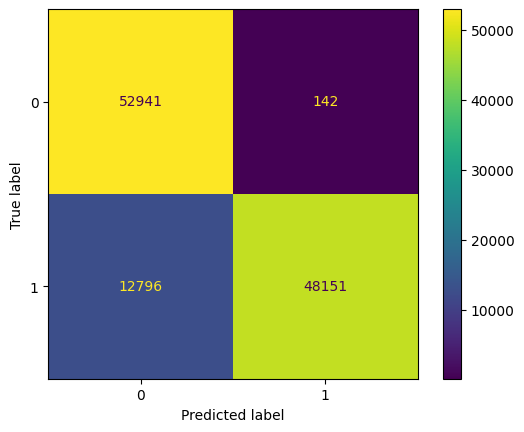

In [ ]:
cm_NB = confusion_matrix(target_train, prediction_on_train_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

In [ ]:
train_predictions_NB = model_NB.predict(predictors_train)
print(classification_report(target_train, train_predictions_NB))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     53083
           1       1.00      0.79      0.88     60947

    accuracy                           0.89    114030
   macro avg       0.90      0.89      0.89    114030
weighted avg       0.91      0.89      0.89    114030



In [ ]:
prediction_on_test_NB = model_NB.predict(predictors_test)

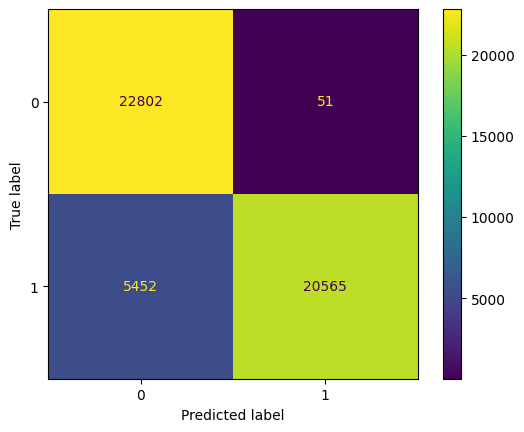

In [ ]:
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

In [ ]:
train_predictions_NB = model_NB.predict(predictors_test)
print(classification_report(target_test, train_predictions_NB))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     22853
           1       1.00      0.79      0.88     26017

    accuracy                           0.89     48870
   macro avg       0.90      0.89      0.89     48870
weighted avg       0.91      0.89      0.89     48870



## Logistic Regression Classifier

### Model 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define Logistic Regression model
model_LR = LogisticRegression(penalty='l2', C=0.001, max_iter=50, random_state=1, solver='lbfgs')

# Train the model
model_LR.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001, max_iter=50, random_state=1)

In [ ]:
# Predictions on training data
prediction_on_train_LR = model_LR.predict(predictors_train)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Training)')

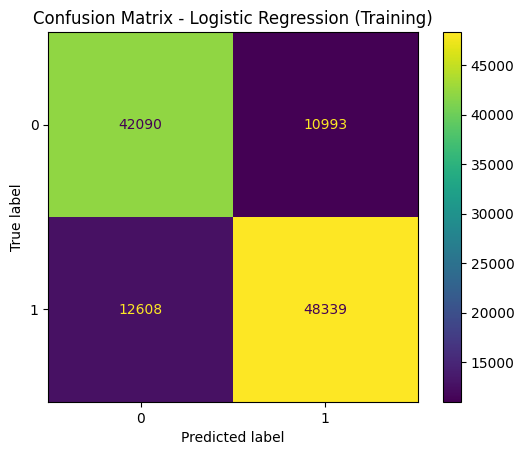

In [ ]:
# Confusion Matrix for Training Data
cm_LR_train = confusion_matrix(target_train, prediction_on_train_LR)
ConfusionMatrixDisplay(confusion_matrix=cm_LR_train, display_labels=model_LR.classes_).plot()
plt.title("Confusion Matrix - Logistic Regression (Training)")

In [ ]:
# Classification Report for Training Data
print("Classification Report (Training Data):")
print(classification_report(target_train, prediction_on_train_LR))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     53083
           1       0.81      0.79      0.80     60947

    accuracy                           0.79    114030
   macro avg       0.79      0.79      0.79    114030
weighted avg       0.79      0.79      0.79    114030



In [ ]:
# Predictions on test data
prediction_on_test_LR = model_LR.predict(predictors_test)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Test)')

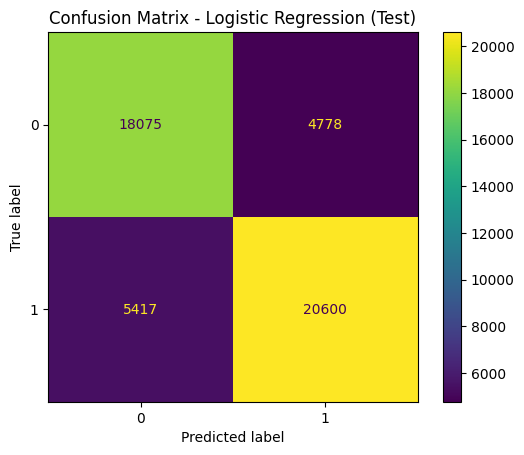

In [ ]:
# Confusion Matrix for Test Data
cm_LR_test = confusion_matrix(target_test, prediction_on_test_LR)
ConfusionMatrixDisplay(confusion_matrix=cm_LR_test, display_labels=model_LR.classes_).plot()
plt.title("Confusion Matrix - Logistic Regression (Test)")

In [ ]:
# Classification Report for Test Data
print("Classification Report (Test Data):")
print(classification_report(target_test, prediction_on_test_LR))

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     22853
           1       0.81      0.79      0.80     26017

    accuracy                           0.79     48870
   macro avg       0.79      0.79      0.79     48870
weighted avg       0.79      0.79      0.79     48870



### Model 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define Logistic Regression model
model_LR1 = LogisticRegression(penalty='l2', C=0.0001, max_iter=100, random_state=1, solver='lbfgs')

# Train the model
model_LR1.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001, random_state=1)

In [ ]:
# Predictions on training data
prediction_on_train_LR1 = model_LR1.predict(predictors_train)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Training)')

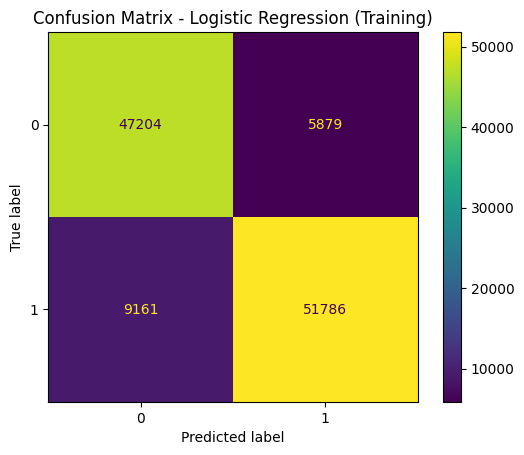

In [ ]:
# Confusion Matrix for Training Data
cm_LR1_train = confusion_matrix(target_train, prediction_on_train_LR1)
ConfusionMatrixDisplay(confusion_matrix=cm_LR1_train, display_labels=model_LR1.classes_).plot()
plt.title("Confusion Matrix - Logistic Regression (Training)")

In [ ]:
# Classification Report for Training Data
print("Classification Report (Training Data):")
print(classification_report(target_train, prediction_on_train_LR1))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     53083
           1       0.90      0.85      0.87     60947

    accuracy                           0.87    114030
   macro avg       0.87      0.87      0.87    114030
weighted avg       0.87      0.87      0.87    114030



In [ ]:
# Predictions on test data
prediction_on_test_LR1 = model_LR1.predict(predictors_test)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Test)')

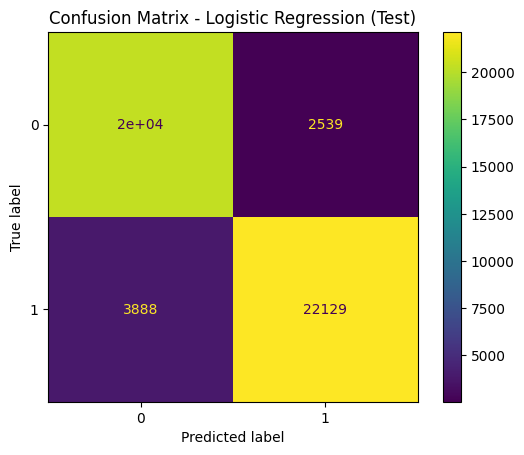

In [ ]:
# Confusion Matrix for Test Data
cm_LR1_test = confusion_matrix(target_test, prediction_on_test_LR1)
ConfusionMatrixDisplay(confusion_matrix=cm_LR1_test, display_labels=model_LR1.classes_).plot()
plt.title("Confusion Matrix - Logistic Regression (Test)")

In [ ]:
# Classification Report for Test Data
print("Classification Report (Test Data):")
print(classification_report(target_test, prediction_on_test_LR1))

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     22853
           1       0.90      0.85      0.87     26017

    accuracy                           0.87     48870
   macro avg       0.87      0.87      0.87     48870
weighted avg       0.87      0.87      0.87     48870



### Model 3

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define Logistic Regression model
model_LR2 = LogisticRegression(penalty='l2', C=0.0001, max_iter=200, random_state=1, solver='lbfgs')

# Train the model
model_LR2.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001, max_iter=200, random_state=1)

In [ ]:
# Predictions on training data
prediction_on_train_LR2 = model_LR2.predict(predictors_train)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Training)')

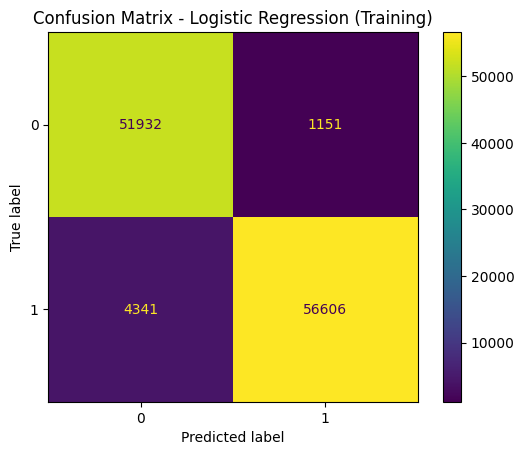

In [ ]:
# Confusion Matrix for Training Data
cm_LR2_train = confusion_matrix(target_train, prediction_on_train_LR2)
ConfusionMatrixDisplay(confusion_matrix=cm_LR2_train, display_labels=model_LR2.classes_).plot()
plt.title("Confusion Matrix - Logistic Regression (Training)")

In [ ]:
# Classification Report for Training Data
print("Classification Report (Training Data):")
print(classification_report(target_train, prediction_on_train_LR2))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     53083
           1       0.98      0.93      0.95     60947

    accuracy                           0.95    114030
   macro avg       0.95      0.95      0.95    114030
weighted avg       0.95      0.95      0.95    114030



In [ ]:
# Predictions on test data
prediction_on_test_LR2 = model_LR2.predict(predictors_test)

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression (Test)')

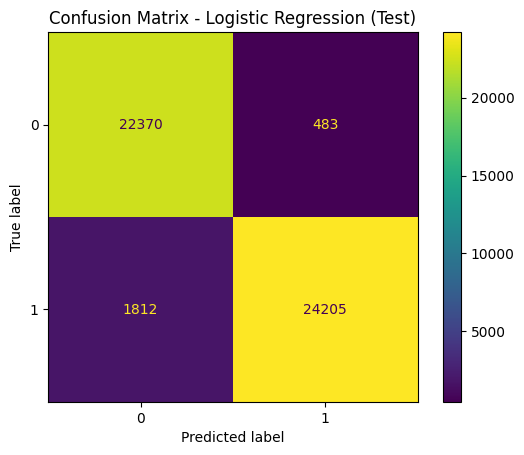

In [ ]:
# Confusion Matrix for Test Data
cm_LR2_test = confusion_matrix(target_test, prediction_on_test_LR2)
ConfusionMatrixDisplay(confusion_matrix=cm_LR2_test, display_labels=model_LR2.classes_).plot()
plt.title("Confusion Matrix - Logistic Regression (Test)")

In [ ]:
# Classification Report for Test Data
print("Classification Report (Test Data):")
print(classification_report(target_test, prediction_on_test_LR2))

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     22853
           1       0.98      0.93      0.95     26017

    accuracy                           0.95     48870
   macro avg       0.95      0.95      0.95     48870
weighted avg       0.95      0.95      0.95     48870



## K - Nearest Neighbors

### Model 1

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors = 3)
modelKNN.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction_on_train_KNN = modelKNN.predict(predictors_train)
prediction_on_test_KNN = modelKNN.predict(predictors_test)

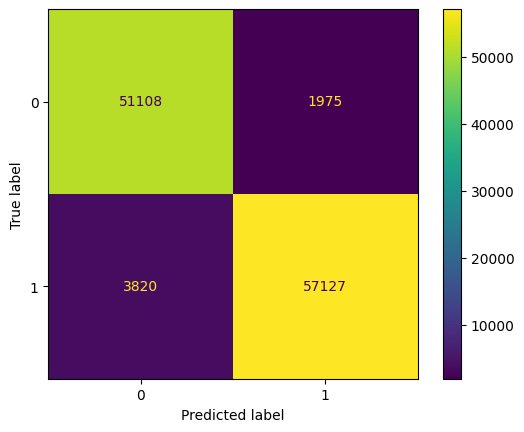

In [ ]:
cm = confusion_matrix(target_train, prediction_on_train_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN.classes_).plot()

In [ ]:
print(classification_report(target_train, prediction_on_train_KNN))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     53083
           1       0.97      0.94      0.95     60947

    accuracy                           0.95    114030
   macro avg       0.95      0.95      0.95    114030
weighted avg       0.95      0.95      0.95    114030



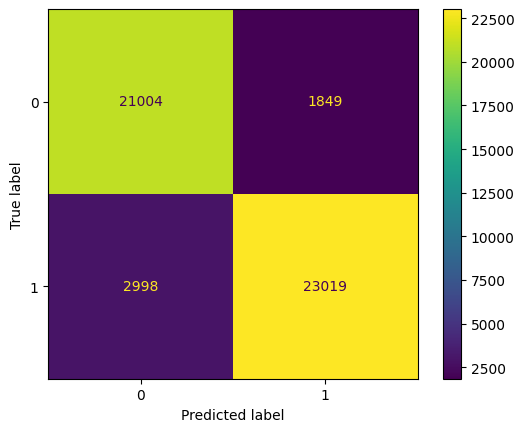

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test_KNN))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22853
           1       0.93      0.88      0.90     26017

    accuracy                           0.90     48870
   macro avg       0.90      0.90      0.90     48870
weighted avg       0.90      0.90      0.90     48870



### Model 2

In [ ]:
modelKNN1 = KNeighborsClassifier(n_neighbors = 10)
modelKNN1.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
prediction_on_train_KNN1 = modelKNN1.predict(predictors_train)
prediction_on_test_KNN1 = modelKNN1.predict(predictors_test)

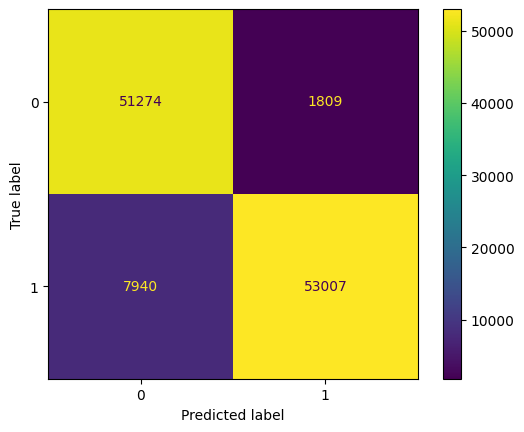

In [ ]:
cm = confusion_matrix(target_train, prediction_on_train_KNN1)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN1.classes_).plot()

In [ ]:
print(classification_report(target_train, prediction_on_train_KNN1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91     53083
           1       0.97      0.87      0.92     60947

    accuracy                           0.91    114030
   macro avg       0.92      0.92      0.91    114030
weighted avg       0.92      0.91      0.91    114030



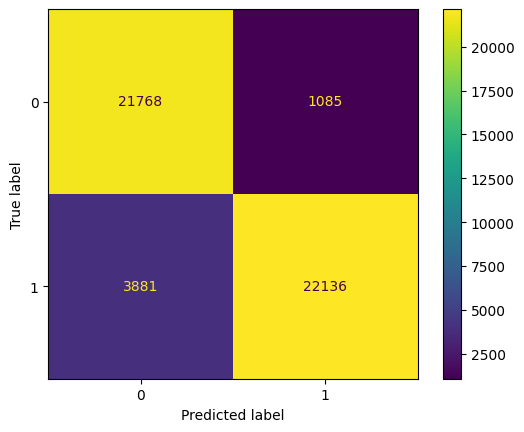

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test_KNN1)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNN1.classes_).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test_KNN1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22853
           1       0.95      0.85      0.90     26017

    accuracy                           0.90     48870
   macro avg       0.90      0.90      0.90     48870
weighted avg       0.90      0.90      0.90     48870



##MLP model

In [ ]:
model_MLP1 = MLPClassifier(hidden_layer_sizes=(32, 16), activation='tanh',
                           alpha=0.005, learning_rate_init=0.001, random_state=1)
model_MLP1.fit(predictors_train, target_train)

MLPClassifier(activation='tanh', alpha=0.005, hidden_layer_sizes=(32, 16),
              random_state=1)

In [ ]:
prediction_on_train = model_MLP1.predict(predictors_train)

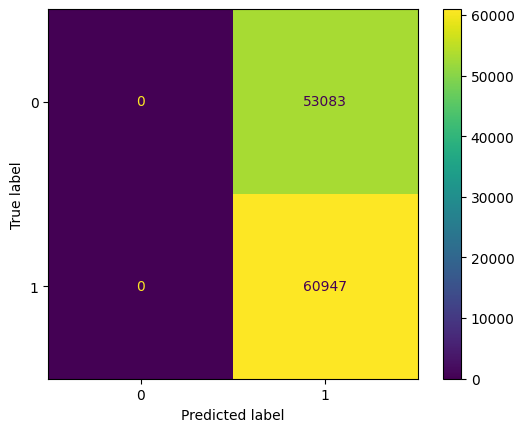

In [ ]:
cm = confusion_matrix(target_train, prediction_on_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     53083
           1       0.53      1.00      0.70     60947

    accuracy                           0.53    114030
   macro avg       0.27      0.50      0.35    114030
weighted avg       0.29      0.53      0.37    114030



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
prediction_on_test = model_MLP1.predict(predictors_test)

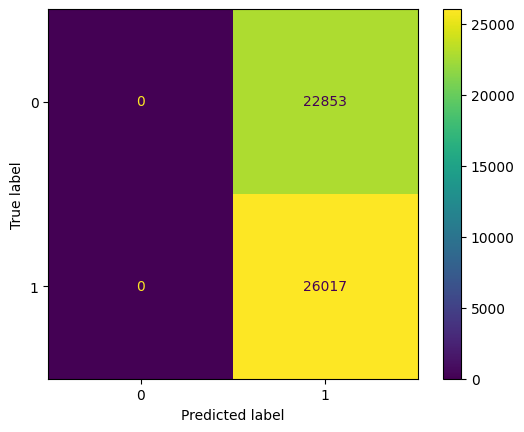

In [ ]:
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22853
           1       0.53      1.00      0.69     26017

    accuracy                           0.53     48870
   macro avg       0.27      0.50      0.35     48870
weighted avg       0.28      0.53      0.37     48870



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Overall Comparison

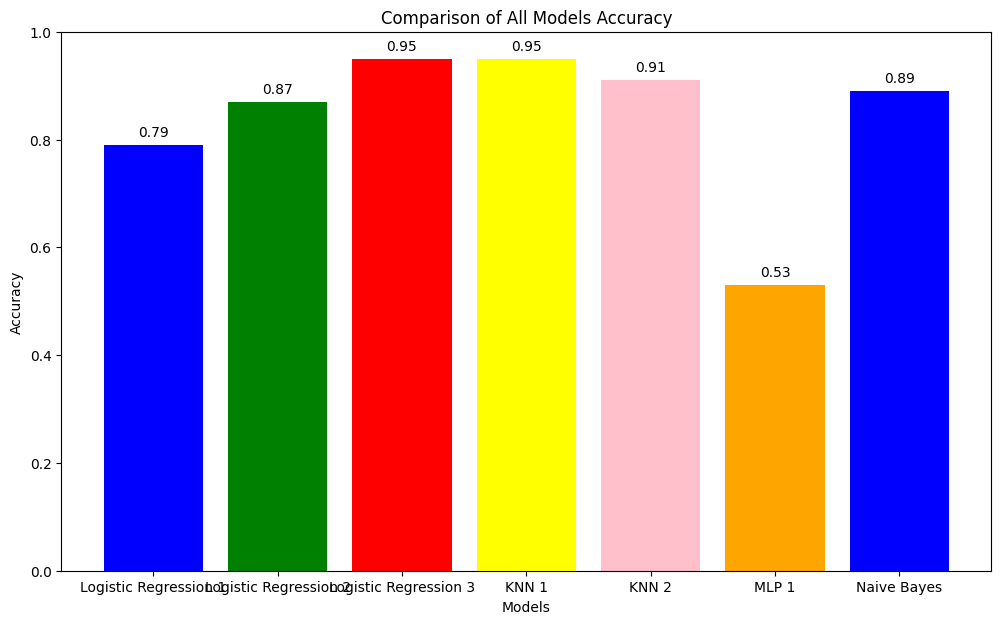

In [ ]:
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression 1': 0.79,
    'Logistic Regression 2': 0.87,
    'Logistic Regression 3': 0.95,
    'KNN 1': 0.95,
    'KNN 2': 0.91,
    'MLP': 0.53,
    'Naive Bayes': 0.89
}

models = list(accuracies.keys())
accuracy_values = [accuracies[model] for model in models]

plt.figure(figsize=(12, 7))
bars = plt.bar(models, accuracy_values, color=['blue', 'green', 'red', 'yellow', 'pink', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of All Models Accuracy')
plt.ylim([0, 1])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

## Discussions

Model Performances<br>
Naive Bayes (Accuracy: 0.89)
* Strengths:
Performed well in both training and test datasets.
Achieved a balanced performance across precision, recall, and F1-score, especially given the class balancing applied through SMOTE.
* Weaknesses:
Naive Bayes assumes feature independence, which may not hold in real-world scenarios, limiting its accuracy potential.
Struggles with datasets containing highly correlated features.
* Hyperparameters:
Multinomial Naive Bayes does not have many tunable hyperparameters, but its default settings worked well here.

Logistic Regression<br>
* Model 1 (Accuracy: 0.79):
* Analysis: High regularization (C=0.001) limited the model's ability to capture complex relationships, leading to underfitting.

* Model 2 (Accuracy: 0.87):
* Analysis: Moderate regularization (C=0.0001) reduced underfitting compared to Model 1, improving both precision and recall.

* Model 3 (Accuracy: 0.95):
* Analysis: Increased iterations (max_iter=200) allowed the model to converge, reducing underfitting while maintaining good regularization.

K-Nearest Neighbors (KNN)<br>
* Model 1 (k=3) (Accuracy: 0.95):
* Analysis: Low value of k captured local patterns, resulting in high accuracy, but risks overfitting to noise in the dataset.

* Model 2 (k=10) (Accuracy: 0.91):
* Analysis: Increasing k smoothed the decision boundary, reducing overfitting. However, this led to a slight drop in accuracy.

MLP Classifier (Accuracy: 0.53)<br>
* Analysis:
The model significantly underperformed due to a small architecture (hidden layers: (32, 16)) and limited iterations (max_iter not specified but likely defaulted to 200).
Poor precision for one class indicates the model struggled with class imbalance even after SMOTE balancing.

In [2]:
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/ML model.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ML model.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 1702743 bytes to /content/drive/My Drive/Colab Notebooks/ML model.html
